## Linki

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

## Opis cech (features)

### Lista występujących cech w danych:

##### 1. class  _klasa_:
- edible = e    > _jadalne_
- poisonous = p > _trujące_

##### 2. cap-shape  _kształt kapelusza_:
- bell = b      > _dzwon_
- conical = c   > _stożkowy_
- convex = x    > _wypukły_
- flat = f      > _płaski_
- knobbed = k   > _gałkowy_
- sunken = s    > _wklęsły_

##### 3. cap-surface  _powierzchnia kapelusza_:
- fibrous = f   > _włóknista_
- grooves = g   > _rowkowata_
- scaly = y     > _łuskowata_
- smooth = s    > _gładka_

##### 3. cap-color _kolor kapelusza_:
- brown = n     > _brązowy_
- buff = b      > _jasnobrązowożółty_
- cinnamon = c  > _cynamon_
- gray = g      > _szary_
- green = r     > _zielony_
- pink = p      > _różowy_
- purple = u    > _fioletowy_
- red = e       > _czerwony_
- white = w     > _biały_
- yellow = y    > _zółty_

##### 4. bruises _bruzdy_:
- bruises = t   > _prawda_
- no = f        > _fałsz_

##### 5. odor _zapach_:
- almond=a > _migdałowy_
- anise=l >_anyżowy_
- creoote=c >_kreotyzowy_
- fishy=y >_rybi_
- foul=f >_śmierdzący_
- musty=m >_stęchły_
- none=n 
- pungent=p >_cierpki_
- spicy=s > _pikantny_

##### 6. gill-attachment _blaszki:
- attached=a
- descending=d
- free=f
- notched=n

##### 7. gill-spacing _odstępy blaszek_:
- close=c
- crowded=w
- distant=d

##### 8. gill-size _rozmiar blaszek_:
- broad=b
- narrow=n

##### 9. gill-color _kolor blaszek_:
- black=k
- brown=n
- buff=b
- chocolate=h
- gray=g
- green=r
- orange=o
- pink=p
- purple=u
- red=e
- white=w
- yellow=y

##### 10. stalk-shape _trzon_:
- enlarging=e
- tapering=t

##### 11. stalk-root _korzeń trzonu_:
- bulbous=b
- club=c
- cup=u
- equal=e
- rhizomorphs=z
- rooted=r
- missing=?

##### 12. stalk-surface-above-ring _powierzchnia trzonu powyżej pierścienia_:
- fibrous=f > _włóknista_
- scaly=y > _łuskowata_
- silky=k > _jedwabista_
- smooth=s > _gładka_

##### 13. stalk-surface-below-ring _powierzchnia trzonu poniżej pierścienia_:
- fibrous=f
- scaly=y
- silky=k
- smooth=s

##### 14. stalk-color-above-ring _kolor trzonu powyżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 15. stalk-color-below-ring _kolor trzonu poniżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 16. veil-type _typ welonu_:
- parial=p
- universal=u

##### 17. veil-color _kolor welonu_:
- brown=n,
- orange=o
- white=w
- yellow=y

##### 18. ring-number _ilość pierścieni_:
- none=none=o,two=t

##### 19. ring-type _rodzaj pierścienia_:
- cobwebby=c
- evanescent=e
- flaring=f
- large=l
- none=n
- pendant=p
- sheathing=s
- zone=z

##### 20. spore-print-color _kolor zarodników_:
- black=k
- brown=n
- buff=b
- chocolate=h
- green=r
- orange=o
- purple=u
- white=w
- yellow=y

##### 21. population _populacja_:
- abundant=a
- clustered=c
- numerous=n
- scattered=s
- several=v
- solitary=y

##### 22. habitat _środowisko występowania_:
- grasses=g
- leaves=l
- meadows=m
- paths=p
- urban=u
- waste=w
- woods=d

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_digits, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting

In [15]:
df = pd.read_csv('mushrooms.csv')

In [16]:
# domyślnie podaje 5 wierszy
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
# object Dtype = string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [18]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [19]:
# Liczebność grzybór jadalnych (e) i trujących (p):
jadalne = df["class"].value_counts()["e"]
trujace = df["class"].value_counts()["p"]
print(f"Liczba grzybów jadalnych: {jadalne}, trujących: {trujace}.")

Liczba grzybów jadalnych: 4208, trujących: 3916.


In [20]:
#sprawdzenie duplikatów
df.duplicated().any()

False

In [21]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# Sprawdzenie wartości NaN
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [32]:
#zamiana danych na OHE, wywalamy class p - to będzie nasz target (class_e)
df = pd.get_dummies(df)
# df = df.drop(["class_p"], axis=1)

In [35]:
y = df.class_e
x = df.drop(["class_e"], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth=5, bootstrap=True, random_state=1)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [41]:
rf_classifier.score(X_test, y_test)

0.9889230769230769

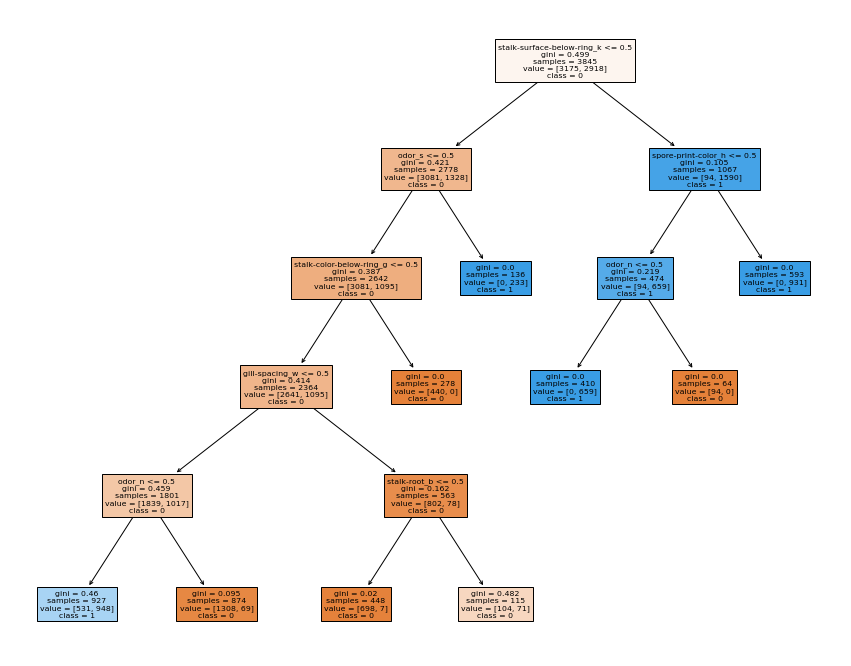

In [29]:
plt.figure(figsize = (15,12))

plot_tree(rf_classifier.estimators_[0],
          feature_names=df_new.columns,
          class_names=["0","1"],
         filled=True);

In [6]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=df_new.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances[feature_importances["importance"]<0.005]

NameError: name 'rf_classifier' is not defined

In [31]:
f_names.shape

(23,)